In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve, auc 

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from IPython.display import Image

In [35]:
bank_full = pd.read_csv("bank1.csv")
bank_subset = pd.read_csv("bank.csv", sep=";")

In [36]:
#Pre-processing for Bank Full
y = bank_full["y"]
X = bank_full.drop("y", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# y_train.value_counts()

((31647, 40), (13564, 40))

In [24]:
#Pre-processing for Bank Subset
ordinal_cate = {
    "education": {"unknown":0, "primary":1, "secondary":2, "tertiary":3},
    "y": {"yes":1, "no":0}
}

bank_subset = bank_subset.replace(ordinal_cate)
bank_subset = bank_subset.replace({"unknown": "AA"})
bank_subset = pd.get_dummies(bank_subset,drop_first=True)
bank_subset.head(3)

,age,education,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,30,1,1787,19,79,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,33,2,4789,11,220,1,339,4,0,0,...,0,0,0,1,0,0,0,1,0,0
2,35,3,1350,16,185,1,330,1,0,0,...,0,0,0,0,0,0,0,1,0,0


[[10968   998]
 [  814   784]]

Detailed Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11966
           1       0.44      0.49      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564

In-Sample: 0.8664110881745798
CV: 0.8696877808887447


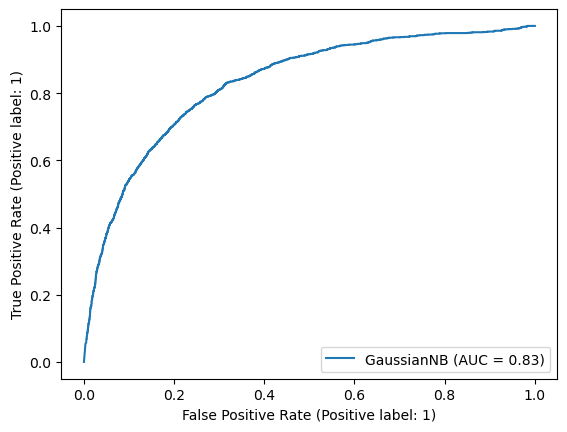

In [37]:
#Naive Bayes
nb = GaussianNB()

nb_clf = nb.fit(X_train, y_train)
y_pred  =  nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print()
print("Detailed Classification Report")
print(classification_report(y_test, y_pred))
print("In-Sample:", ac)

#5-Fold Cross Validation on Naive Bayes
scores = cross_val_score(nb, X_train, y_train, cv=5, scoring="accuracy")
meanScore = scores.mean()
print("CV:", meanScore)

plot_roc_curve(nb_clf, X_test, y_test)

In [26]:
#SVM using Bank Subset
y = bank_subset["y"]
X = bank_subset.drop("y", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# y_train.value_counts()

((3164, 40), (1357, 40))

In [ ]:
#Determine which kernel is the best
# param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# svm1 = SVC(C = 0.001)
# svm1 = GridSearchCV(svm1,param_grid,refit=True, cv = 5, verbose=2)
# svm1.fit(X_train,y_train)

# means = svm1.cv_results_['mean_test_score']
# stds = svm1.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, svm1.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
# print()
# print("Detailed Classification Report")
# y_true, y_pred = y_test, svm1.predict(X_test)
# print(classification_report(y_true, y_pred)) # Linear is still the best

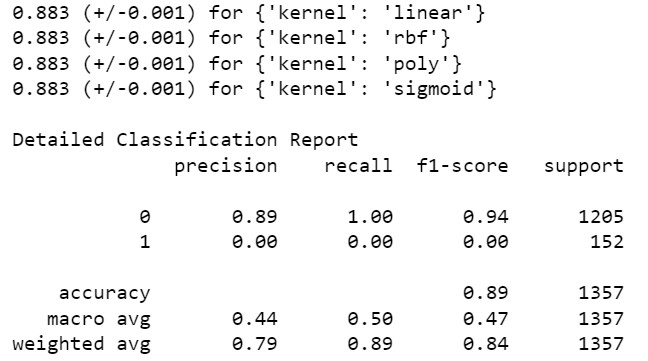

In [21]:
#Output for Best Kernel
Image(filename ="/Users/NetMo/Downloads/MH6804 Group Project/svm_kernel.jpg")

In [ ]:
#Tuning Hyperparameters for Accuracy (C) (Takes 2.5 hours to do GridSearchCV)
# tuned_parameters = {'C': [0.001,0.01,0.1,1]}

# clf = GridSearchCV(svm, param_grid = tuned_parameters, scoring="accuracy" , cv = 5, verbose = 2)
# clf.fit(X_train, y_train)

# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
# print()
# print("Detailed Classification Report")
# y_true, y_pred = y_test, clf.predict(X_test)
# print(classification_report(y_true, y_pred))

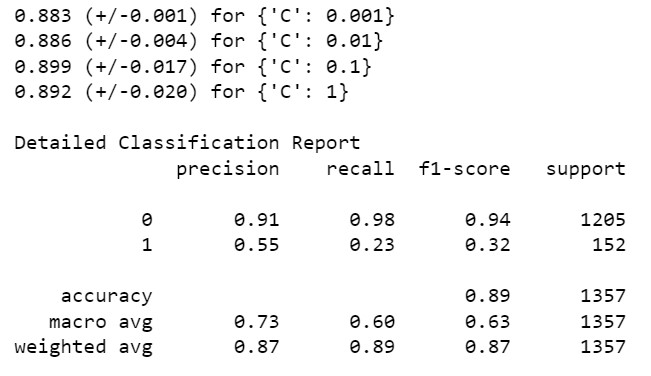

In [22]:
#Output of SVM with Tuning Parameter C (Linear, C = 0.1)
Image(filename ="/Users/NetMo/Downloads/MH6804 Group Project/svm_c.jpg")

In [27]:
#SVM Model with chosen hyperparameters (Train-Test Split)
svm = SVC(kernel = "linear", C = 0.1)
svm_clf = svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(ac)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.55      0.23      0.32       152

    accuracy                           0.89      1357
   macro avg       0.73      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357

0.89240972733972


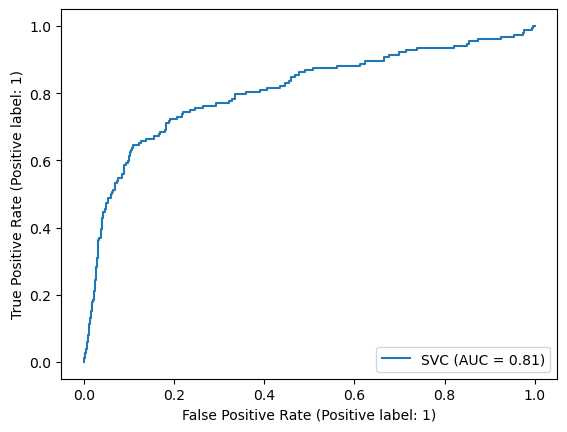

In [28]:
plot_roc_curve(svm_clf, X_test, y_test)

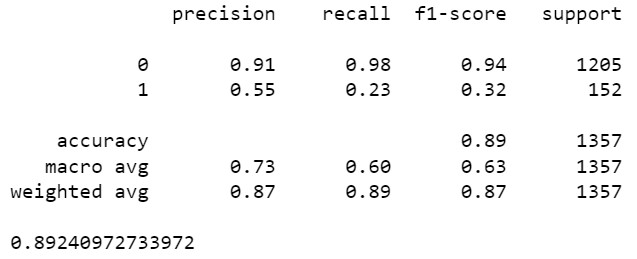

In [31]:
#Output for SVM Model - Train-Test Split
Image(filename ="/Users/NetMo/Downloads/MH6804 Group Project/svm_tts.jpg")

In [ ]:
#5-Fold Cross Validation on SVM
# scores = cross_val_score(svm, X_train, y_train, cv=5, scoring="accuracy")
# meanScore = scores.mean()
# print("CV:", meanScore)

#CV: 0.8991786149939008

In [ ]:
#RBF Kernel
svm2 = SVC(kernel = "rbf")

tuned_parameters = {'C': [0.001,0.01,0.1,1], "gamma": [0.001,0.01,0.1,1]}

clf = GridSearchCV(svm2, param_grid = tuned_parameters, scoring="accuracy" , cv = 5, verbose = 2)
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed Classification Report")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))


In [ ]:
#Polynomial Kernel
svm2 = SVC(kernel = "poly")

tuned_parameters = {'C': [0.001,0.01,0.1,1], "degree": [2,3,4,5]}

clf = GridSearchCV(svm2, param_grid = tuned_parameters, scoring="accuracy" , cv = 5, verbose = 2)
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed Classification Report")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
#Sigmoid Kernel
svm2 = SVC(kernel = "sigmoid")

tuned_parameters = {'C': [0.001,0.01,0.1,1], "degree": [2,3,4,5]}

clf = GridSearchCV(svm2, param_grid = tuned_parameters, scoring="accuracy" , cv = 5, verbose = 2)
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed Classification Report")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))